### Chao Zhu

# MTH9875 Homework 2

Assigned: September 1, 2016.
Due: September 15, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.


### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities:

In [1]:
d3010 <- function(x){(dnorm(x,sd=.1)+dnorm(x,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [8]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

In [9]:
## European call option
EuroCallprice<-function(k){
    ## assume S0=1, r=0
    k1=exp(k)
    return (0.5*BSFormula(1,k1,1,0,0.1)+0.5*BSFormula(1,k1,1,0,0.3))
}

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

In [10]:
EuroCallimpliedvol <- function(k)
{
return (BSImpliedVolCall(1, exp(k), 1, 0, EuroCallprice(k)))
}

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

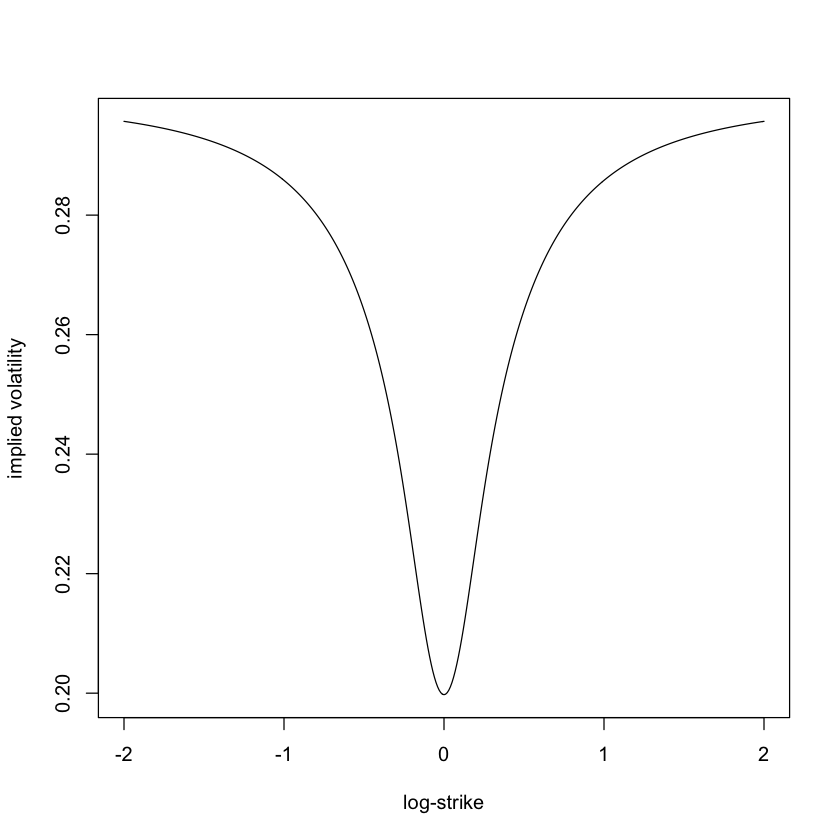

In [20]:
k<-seq(-2.0,2.0,by=0.01)
vol<-EuroCallimpliedvol(k)
plot(k,vol,type='l',xlab="log-strike",ylab="implied volatility")

(d) What is implied volatility at-the-money?  Give intuition as to why.

In [24]:
print(paste0("ATM implied vol: ",EuroCallimpliedvol(0)))

[1] "ATM implied vol: 0.199750157214798"


This is just the average of 10% and 30%. And the intuition lies in when we calculate the value of at the money call option is $C_{ATM}=\frac{\sigma S \sqrt{T}}{\sqrt{2 \pi}}$, and we can see from the regime-switching model, the price is the average of the average price of two calls with 10% and 30% volatility, then the implied is the average of 10% and 30% too.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


(a)
Let 
$$
f(x)=\left|x\right|
$$
we have$f^{'}(x)=sgn(x)$ and $f^{''}(x)=2\delta(x)$
Then
$$
d\left|B_t\right|=df(B_t)=\frac{\partial f}{\partial x}dB_t+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}dt=sgn(B_t)dB_t+\delta(B_t)dt
$$
In the end we have:
$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+\int_0^t\,\delta(B_s)\,ds
$$
Then we can see the local time is equal to delta, so if we want to do delta hedging we can use the length of time we estimate it is a ATM option as the hedge unit.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.